## 고양이 수염 스티커 만들기

In [1]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 

print(cv2.__version__)
print(dlib.__version__)

4.5.3
19.22.1


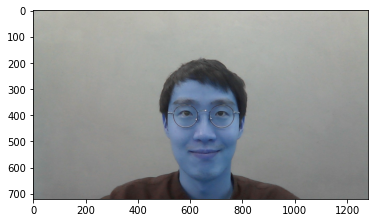

In [2]:
my_image_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/face/WIN_20221007_15_10_08_Pro.jpg' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

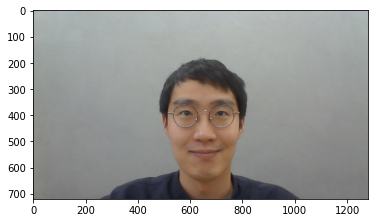

In [3]:
# openCV의 경우 BGR을 사용하기 때문
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

In [4]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

In [5]:
# detector로 찾아봄
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[[(491, 313) (812, 634)]]


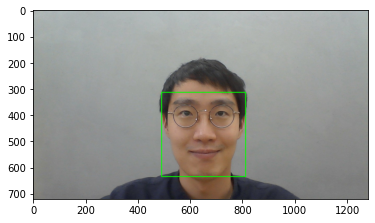

In [6]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [7]:
# landmark 모델 불러와서 할당
model_path = os.getenv("HOME") +'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

In [8]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


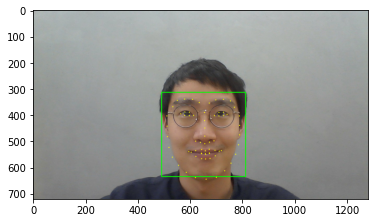

In [9]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [10]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
# → [[(368, 153), (368, 174), (371, 195), (376, 215), (382, 235), (391, 252), (404, 266), (420, 277), (441, 279), (461, 276), (480, 266), (495, 252), (508, 235), (516, 216), (520, 195), (523, 173), (524, 151), (377, 131), (386, 119), (399, 116), (413, 118), (425, 124), (454, 121), (466, 114), (481, 112), (494, 114), (503, 127), (439, 143), (438, 156), (438, 169), (437, 182), (423, 197), (431, 199), (438, 200), (446, 199), (454, 197), (391, 147), (399, 142), (409, 143), (416, 149), (408, 150), (399, 150), (464, 147), (472, 141), (482, 141), (489, 145), (482, 149), (473, 149), (411, 227), (421, 222), (432, 218), (439, 220), (446, 218), (458, 222), (471, 227), (458, 234), (446, 238), (438, 238), (431, 238), (420, 235), (415, 227), (432, 227), (439, 228), (447, 227), (466, 227), (446, 228), (438, 229), (431, 228)]]

# 인중 부위에 콧수염을 붙이는게 좋아보인다.
# w 얼굴영역을 나타내는 직사각형의 가로의 길이로 콧수염의 가로길이 사용
# h 코끝과 윗입술의 끝사이의 세로 길이로 콧수염의 세로길이 사용, 길이의 7배를 콧수염 이미지의 세로 크기로 설정
# (정확히는 두점사이의 거리를 구해야 한다 정면 정자세라고 생각하고 구함)
# -3차원 공간에서 뒤틀림을 생각할 경우 기준점을 잡아 크기와 각도를 계산하여 변환 시켜주어야함
# -같은경우 가로도 마찬가지로 변환 해주어야한다 얼굴 가로 공간 길이를 구해야함

# 만약 콧수염의 위치의 미세조정이나 크기조정이 필요한경우 선형변환 
# 선형변환 (비율지점으로 위치 포인트 변환 or크기자체에 비율배곱하여)으로 크기 조정
# 추후 이미지 픽셀 매트릭스를 좌표 라고 생각하고 같은 기준점에서 선형변환하였을때 전체이미지와 함께 변환될것으로 생각된다. 

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33], landmark[51]) # 코끝의 index는 33 입니다, 윗입술의 중간랜드마크 51
    x = (landmark[33][0]+landmark[51][0])//2 # # 코끝의 index는 33 입니다, 윗입술의 중간랜드마크 51의 중간 x값
    y = (landmark[33][1]+landmark[51][1])//2 # 코끝의 index는 33 입니다, 윗입술의 중간랜드마크 51의 중간 y값
    w = dlib_rect.width()
    h = (landmark[33][1]-landmark[51][1])*7
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(656, 509) (658, 536)
(x,y) : (657,522)
(w,h) : (322,-189)


In [11]:
# landmark 51은 입술 끝으로 분명히  33보다 y값이 낮아야 하는데 이상하다
landmark[52]

(673, 530)

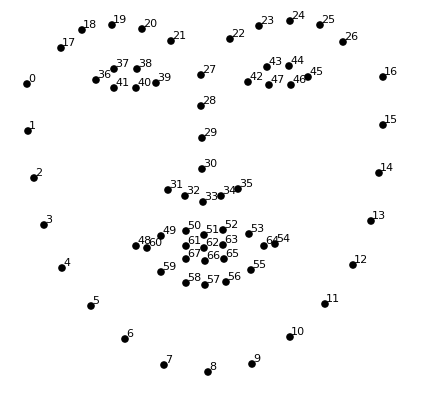

In [12]:
# 랜드마크 51 보다 우상단에 있는 랜드마크 52의 값 추출
# 더 위쪽에 있는 랜드마크가 y 값이 더 낮아지는것으로 보아
# 픽셀 넘버링이 y값은 이미지의 최상단, 위에서 부터 0이다
# x 값은 늘어난것으로 보아 좌측부터 0

In [13]:
# h 값 재설정: 값이 큰 값에서 작은 값을 빼는 값으로 다시 설정. landmark[51][1]-landmark[33][1]
# x와 y point도 인중에서 코의 중심으로 변경 landmark[30] : 콧수염이미지를 보니 수염만 있는 것이 아니라 코부분도 포함하고 있음.

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33], landmark[51], landmark[30]) # 코끝의 index는 33 입니다, 윗입술의 중간랜드마크 51
    x = landmark[30][0] 
    y = landmark[30][1]
    w = dlib_rect.width()
    h = (landmark[51][1]-landmark[33][1])*7
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(656, 509) (658, 536) (656, 480)
(x,y) : (656,480)
(w,h) : (322,189)


(189, 322, 3)


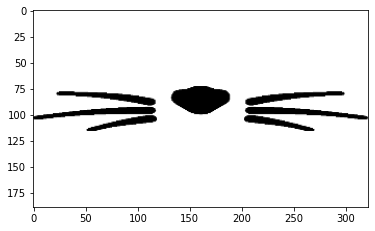

In [14]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # 고양이 콧수염 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → 
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인
plt.imshow(img_sticker)

In [15]:
# (h, w, c) 순으로 나오나봄 c= color(RGB)

In [16]:
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 
# 이미지 시작점은 top-left 좌표이기 때문입니다.
# w 콧수염의 가로길이, h 콧수염의 세로 길이
refined_x = x - w//2 
refined_y = y - h//2 
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
# refined_x, refined_y값에서 콧수염 이미지가 시작됨


(x,y) : (495,386)


In [17]:
# 혹시나 콧수염이 이미지 파일 크기를 넘어갈 것을 대비해 자르는 방법
# 이번사진의 값을 보면 넘어가지 않으나 연습삼아 코딩

# 이미지가 원본 이미지의 상단이나 좌측으로 넘어간 경우(시작점이 음수값이 나옴)
# 음수값(넘어간 픽셀) 만큼 적용한 스티커이미지(콧수염)를 자른다.
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0 # 이미지를 씌우기 위해 이미지가 시작할 x좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] 
    refined_y = 0
# 이미지가 원본 우측이나 아래로 넘어간 경우
# 이미지 시작지점은 좌상단이므로 수정해줄필요없고 스티커이미지만 그 크기만큼 잘라주면 된다 
# 전체 이미지 파일크기를 넘어갈수 없으므로 코드 생략

    
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (495,386)


In [18]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# 콧수염 이미지에서 사용할 부분은 255이 아닌 색이 있는 부분을 사용합니다.
# 콧수염 이미지에서 255이 나오는 부분은 흰색이다.
# 그렇기 때문에 0인 부분(이미지가 없는 부분)은 제외하고 적용
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
# np.where는 조건에 해당하는 인덱스만 찾아서 값을 적용하는 방법이다.
# 위 코드에서는 img_sticker가 255일 경우(콧수염 이미지에서 콧수염 부분 제외한 나머지 이미지)에는 sticker_area(원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지)를 적용하고,
# 나머지 부분은 img_sticker(콧수염 이미지)를 적용한다.

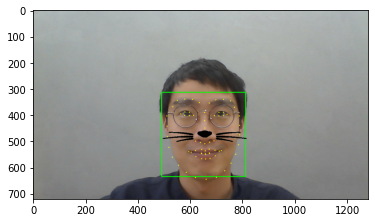

In [19]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [20]:
# 콧수염의 위치를 조정: 콧수염 이미지의 중앙의 픽셀의 값을 코의 중앙에서 코 끝과 코 중앙의 5/7 지점으로 변경


for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33], landmark[51], landmark[30]) # 코끝의 index는 33 입니다, 윗입술의 중간랜드마크 51
    x = int((landmark[30][0]*2 + landmark[33][0]*5)/7) # 픽셀은 정수 값이므로 최종값을 int로 변환
    y = int((landmark[30][1]*2 + landmark[33][1]*5)/7)
    w = dlib_rect.width()
    h = (landmark[51][1]-landmark[33][1])*7
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    

(656, 509) (658, 536) (656, 480)
(x,y) : (656,500)
(w,h) : (322,189)


In [21]:
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 
# 이미지 시작점은 top-left 좌표이기 때문입니다.
# w 콧수염의 가로길이, h 콧수염의 세로 길이
refined_x = x - w//2 
refined_y = y - h//2 
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
# refined_x, refined_y값에서 콧수염 이미지가 시작됨


(x,y) : (495,406)


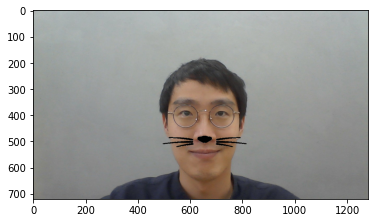

In [22]:
my_image_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/face/WIN_20221007_15_10_08_Pro.jpg' # 이미지를 다시불러옴.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy() 
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 촬영 거리에 따른 영향도 분석


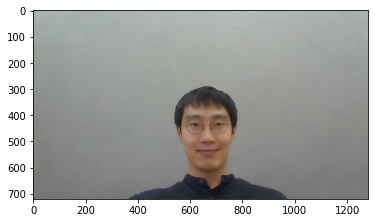

In [23]:
my_image_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/face/WIN_20221007_15_13_05_Pro.jpg' # 멀리서 찍은 이미지파일.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy() 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show()

rectangles[[(563, 365) (786, 588)]]


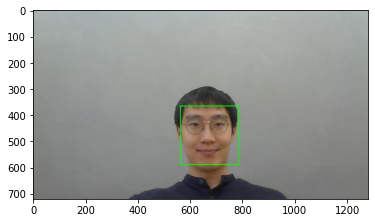

In [24]:
# detector로 찾아봄
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- 얼굴의 위치는 잘 잡아냄

68


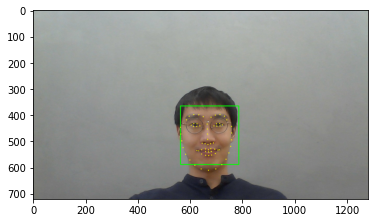

In [25]:
# 랜드마크 확인

list_landmarks = []
    
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
print(len(list_landmarks[0]))

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- 랜드마크도 잘 잡아냄

(668, 512) (670, 532) (667, 492)
(x,y) : (667,506)
(w,h) : (224,140)
(x,y) : (555,436)


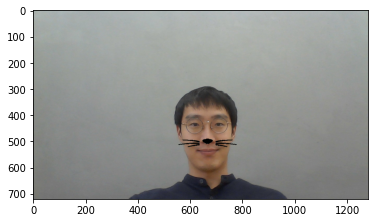

In [26]:
# 콧수염 붙이기

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33], landmark[51], landmark[30]) # 코끝의 index는 33 입니다, 윗입술의 중간랜드마크 51
    x = int((landmark[30][0]*2 + landmark[33][0]*5)/7) # 픽셀은 정수 값이므로 최종값을 int로 변환
    y = int((landmark[30][1]*2 + landmark[33][1]*5)/7)
    w = dlib_rect.width()
    h = (landmark[51][1]-landmark[33][1])*7
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # 고양이 콧수염 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h))    
    
refined_x = x - w//2 
refined_y = y - h//2 
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

my_image_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/face/WIN_20221007_15_13_05_Pro.jpg' # 이미지를 다시불러옴.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy() 
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

1. 콧수염 잘 붙음
2. 촬영거리라는 변수의 영향도를 생각해 보았을 때,
- 촬영거리가 너무 멀어지거나 멀어지면서 배경화면과 겹쳐, 픽셀단위로 얼굴 윤곽선이 구분이 안되어 dector_hog로 dlib_rect가 생성이 안되는 경우
- 촬영거리가 너무 멀어져 이미지파일 자체가 위의 랜드마크모델을 사용하였을 때, 물리적으로 랜드마크 생성이 어려운 경우

  위의 두 경우를 제외하고는  콧수염 이미지 파일을 붙이는 데는 크게 문제가 없을 것 같다.

# 얼굴 각도에 따른 영향도 분석 

- 3차원인 물체(이경우에서는 사람 얼굴)를 2차원 평면 사진 이미지로 출력하였으므로 3차원 뒤틀림을 고려하여 분석하여야 한다
- 사진이 찍힌 평면을 기준으로 가로방향을 x, 세로방향을 y,이 평면과 수직인 임의의 축을 z라고 하였을 때,
- 물체를 각 평면(xy, yz, zx) 상의 기울임 각도로 나누어 분석할 수 있다.
- 콧수염 스티커(2차원에 가까운 물체로 가정, z값은 무시할정도로 작다고 가정) 를 붙이는 경우 얼굴의 특정부위에 붙이는 것으로정면을 보고 있는 얼굴면을 기준으로 xy평면에 평행한 평면상 2차원 이미지의 변화각도를 반영하여 붙인다. (실제로는 붙이는 물체나 붙여질 물체가 3차원 물체이고 3차원 뒤틀림에 따라 2차원 평면에 투사되는 이미지가 달라지는 경우 그 물체의 변화된 2차원 투사이미지 변화값을 알고 있어야 한다. 예측가능한 이미지가 아닐경우 뒤틀림 정도에 따라 특정 투사이미지를 가질 수 있다.)

- 위에 제공된 랜드마크 모델의 경우 사진을 찍는 평면(xy)위에서의 변화를 반영하고, yz평면 위에서 얼굴의 랜드마킹 변화 각도까지는 반영한다고 할 수 있으나 3차원 뒤틀림 정도를 반영하여 랜드마킹 하지 못하는 모델이다.
- 추후 나온 랜드마크 모델은 3차원 뒤틀림 까지 반영하여 랜드마킹 하는 모델을 제공한다. 아래 URL에서 모델을 다운 받을 수 있다.
https://github.com/davisking/dlib-models/blob/master/mmod_human_face_detector.dat.bz2
- 본 노트에서는 기존의 랜드마크 모델을 가지고 xy평면 상 기울임 정도를 반영하여 콧수염 스티커를 붙이는 작업을 예시로 작성하였다.
- 얼굴의 랜드마크들을 동일 평면에 찍었다고 가정하고, 얼굴을 평면으로 가정, 랜드마크의 위치에 따라 콧수염의 크기와 위치를 선형변환 및 어파인변환하여 원본이미지와 합성 한다.

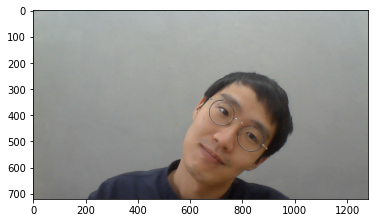

In [27]:
my_image_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/face/WIN_20221007_15_10_56_Pro.jpg' # 얼굴각도를 변경한 사진
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy() 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) 
plt.show()

rectangles[[(562, 348) (883, 669)]]


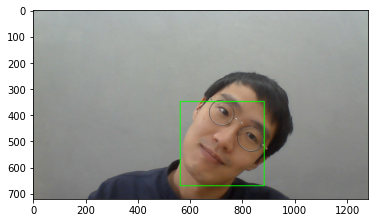

In [28]:
# detector로 rect 찾아봄
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

68


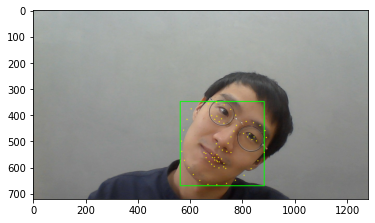

In [29]:
# 랜드마크 확인

list_landmarks = []
    
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
print(len(list_landmarks[0]))

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 눈 부위의 랜드마크가 밀린것을 확인 하였다.
# 랜드마크를 설정할 얼굴 rect가 작아서 발생했을 수 있다고 생각하여 
# rect pyramid를 높여, 윤곽선을 부드럽게하여 얼굴 rect를 넓혀 랜드마크 생성 해보려고 한다.
# 코 부위에 스티커를 붙일 것이므로 랜드마크 변경은 필요가 없어 보이긴한다.

rectangles[[(582, 324) (915, 657)]]


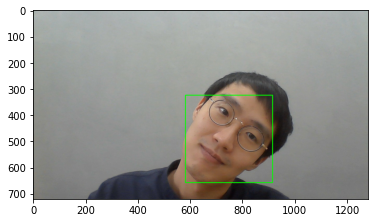

In [30]:
my_image_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/face/WIN_20221007_15_10_56_Pro.jpg' # 얼굴각도를 변경한 사진 다시가져옴
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy() 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# detector로 rect 찾아봄
# pyramid를 2로 올려 윤곽선을 더부드럽게 하여 더 넓은 영역의 rect를 선정하도록 변경
dlib_rects = detector_hog(img_rgb, 2)   # (image, num of image pyramid)
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

68


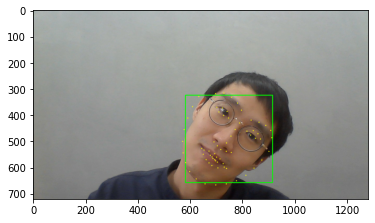

In [31]:
# 랜드마크 확인

list_landmarks = []
    
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
print(len(list_landmarks[0]))

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 대체적으로 잘 찾아낸것을 확인

- 콧수염 스티커를 변경할 각도 확인

- 사진에서 12방향을 0도라고 설정, landmark33(코끝)에서 landmark30(코중앙)으로의 2차원 벡터 값을 구해 각도를 구한다.(픽셀의 위치로 계산)
- 콧수염의 크기는 xy평면상의 각도 변환이기 때문에, 변하지 않는다고 가정. (yz, zx 쪽 변환은 있었더라도 미미하여 무시하였다.)
- yz 또는 zx 방향의 경우, 투사면적은 콧수염을 직사각 평면(z값이 작으므로) 또는 직육면체 물체로 생각하여 각각 cos 값으로 예상해 구한 후 각각 곱한다.


In [32]:
# 콧수염 스티커를 변경할 각도 확인

# 사진에서 12방향을 0도라고 설정, landmark[33](코끝)에서 landmark[30](코중앙)로의 2차원 벡터 값을 구해 각도를 구한다.(픽셀의 위치로 계산)
# 콧수염의 크기는 xy평면상의 각도 변환이기 때문에 변하지 않는다고 가정. (yz, zx 쪽 변환은 미미하여 무시하였다.)
# yz 또는 zx 방향의 경우, 투사면적은 콧수염을 직사각 평면(또는 직육면체)으로 생각하여 각각 cos 값으로 구하여 각각 곱한다.

# 벡터값 (이미지의 좌상단을 (0,0)의 좌표평면으로 보고 landmark[30]벡터에서 landmark[33]벡터를 빼주었다)
vect_33_30 = (landmark[30][0]-landmark[33][0], landmark[30][1]-landmark[33][1])
print(vect_33_30)
# 12시를 기준으로 시계방향으로 기울임 각도를 degree 라고 할때 tan(degree) = |-25|/22
# 파이썬 NumPy 로 각도 구하기 
#(TMI: math 모듈 내부의 메소드로도 한개의 값에 대해서 구할 수 있으나 list 형태에 대에 한번에 적용은 불가능하다)
import numpy as np
r = np.arctan(abs(vect_33_30[1])/vect_33_30[0])
print(r)
# 라디안 각도로 나옴 degree로 변환
import math
math.degrees(r)

(22, -25)
0.8491414759301354


48.65222278030634

(189, 322, 3)


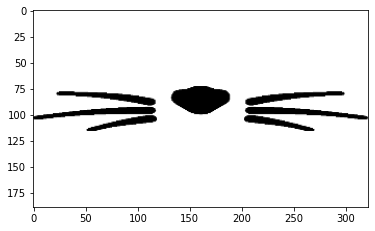

In [33]:
#콧수염 이미지 크기 변경 및 각도 변경하기
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # 고양이 콧수염 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (322,189)) # 스티커 이미지 조정 → 위에 기술한 이유로 처음사용한 크기와 동일하게 사용 특정랜드마크간의 길이를 이용하여 다시구해도됨
np.where
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인
plt.imshow(img_sticker)

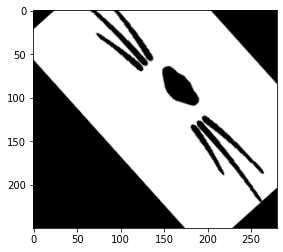

In [34]:
cross = int(((img_sticker.shape[1]*img_sticker.shape[1]+img_sticker.shape[0]*img_sticker.shape[0])**0.5))
r_c = int(img_sticker.shape[1]/2), int(img_sticker.shape[0]/2)
r_d = -48
N_h, N_w = 280, 250

r_image = cv2.getRotationMatrix2D(r_c, r_d, 1)
result = cv2.warpAffine(img_sticker, r_image, (N_h, N_w))
plt.imshow(result)
#회전하고 공백부분이 검은색으로 출력됨

In [35]:
white_img = np.zeros([250,280,3])+255 # 흰색배경과 합쳐 검은부분 보완
white_img

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

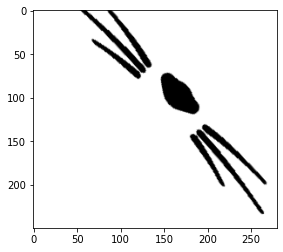

In [41]:
#콧수염 색이 검은색이라 np.where 로 보완 안됨
# 해결방안 1. 콧수염색을 바꿔서 np.where 써도되고 그냥 이미지자체를 각도를 바꾼것을 가져와서 붙여도됨
# 해결방안 2. cv2.warpAffine 함수내에 보간방식을 설정할 수 있는 파라미터가 있음
# borderValue:  cv2.BORDER_CONSTANT일 때 사용할 상수 값. 기본값은 0(검정색) ->255로 흰색으로 바꿈
result = cv2.warpAffine(img_sticker, r_image, (N_h, N_w), borderValue = (255,255,255))
plt.imshow(result)

(717, 531) (701, 560) (739, 506)
(x,y) : (723,523)
(w,h) : (334,203)
(x,y) : (556,422)


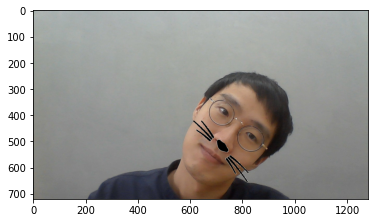

In [42]:

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33], landmark[51], landmark[30]) # 코끝의 index는 33 입니다, 윗입술의 중간랜드마크 51
    x = int((landmark[30][0]*2 + landmark[33][0]*5)/7) # 픽셀은 정수 값이므로 최종값을 int로 변환
    y = int((landmark[30][1]*2 + landmark[33][1]*5)/7)
    w = dlib_rect.width()
    h = (landmark[51][1]-landmark[33][1])*7
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # 고양이 콧수염 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h))    
    
refined_x = x - w//2 
refined_y = y - h//2 
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

my_image_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/face/WIN_20221007_15_10_56_Pro.jpg' # 이미지를 다시불러옴.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy() 
sticker_area = img_show[refined_y:refined_y+result.shape[0], refined_x:refined_x+result.shape[1]]
img_show[refined_y:refined_y+result.shape[0], refined_x:refined_x+result.shape[1]] = \
    np.where(result==255,sticker_area,result).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

- 잘 붙음 
- 사실 위의 기울임 각도 내에서는 회전후 콧수염이미지가 잘리지 않은 것으로 보이나 회전 후 콧수염 이미지가 잘릴 경우(y=0 값을 벗어나 상단으로 넘어갈 경우) 회전 후 이미지의 y  값 범위를 -값을 설정하여 크게 해주어야한다. 방법 확인 필요
- 생략한 yz, xz 방향의 뒤틀림(기울임)의 경우 
- 각도 계산 방법으로 
- 3차원 뒤틀림을 얼굴 이미지 상의 특정 피쳐를 통해 직접 계산하거나(예를들어 눈의 피사체 거리에 따른 크기 차이 콧대의 좌우 기울임 각도, 눈썹의 모양 등) 
- 어차피 상기한 3차원 뒤틀림을 계산하여 랜드마킹하는 모델을 사용할 것이므로 3차원 모델링 랜드마크를 가지고 랜드마킹 후, 랜드마크를 통해 위의 방법으로 뒤틀림 각을 계산, 콧수염의 크기 및 뒤틀림을 예측하여 산출, 투사 이미지로 변환, 원본이미지에 붙인다. 

# 명암에 따른 영향도 분석

- 명암 정도가 너무 어두워지거나 너무 밝아져, 픽셀단위로 얼굴 윤곽선이 구분이 안되어 dector_hog로 dlib_rect가 생성이 안되는 경우
- 명암 정도가 너무 어두워지거나 너무 밝아져, 이미지파일 자체가 위의 랜드마크모델을 사용하였을 때, 물리적으로 랜드마크 생성이 어려운 경우

  위의 두 경우를 제외하고는  콧수염 이미지 파일을 붙이는 데는 크게 문제가 없을 것 같다.